In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

from scipy.stats import norm

# GOAL 1: Implementation

<h4> The Schwartz one-factor model </h4>

The goal of this TP is to investigate the properties of the Schwartz one-factor model. Recall from the lecture that the $\mathbb P$-dynamics of the spot price is

$$
dS_t = \kappa (\mu - \log S_t) S_t dt + \sigma S_t dW^{\mathbb P}_t,
$$

where $W^{\mathbb P}_t$ is a Brownian motion under the historical measure $\mathbb P$. Here $\kappa > 0$, $\mu \in \mathbb R$, and $\sigma > 0$ are parameters. The $\mathbb Q$-dynamics of the spot price is

$$
dS_t = \kappa (\mu - \lambda - \log S_t) S_t dt + \sigma S_t dW^{\mathbb Q}_t,
$$

where $W^{\mathbb Q}_t = W^{\mathbb P}_t + \frac{\kappa \lambda}{\sigma} t$ is a Brownian motion under the risk-neutral measure $\mathbb Q$. Here $\lambda$ is a market price of risk parameter. Since the $\mathbb Q$-drift is always equal to $(r - y_t) S_t dt$ where $y_t$ is the convenience yield, it follows that

$$
y_t = r - \kappa (\mu - \lambda) + \kappa \log S_t.
$$

Use the parameter values

$$
\kappa = 0.3 \qquad \mu = 3.1 \qquad \sigma = 0.4 \qquad \lambda = -0.2
$$

and start the spot price at $S_0 = 19$.

In [2]:
T, kappa, mu, sigma, lam, S0, r = 2, 0.3, 3.1, 0.4, -0.2, 19, 0.03 

<h2> <span style='color:green'>Question A</span> </h2>

<span style='color:green'>**(a)**</span> Simulate and plot the $\mathbb P$-dynamics of the spot price $S_t$ for $t \in [0,T]$.

<span style='color:green'>**(b)**</span> Repeat (a) using the $\mathbb Q$-dynamics instead of the $\mathbb P$-dynamics.

In [3]:
def sim_W(T,N):
    dt = T/N # size of the intervals
    times = dt*np.arange(0,N+1) # grid of times t_0,...,t_N
    dW = np.sqrt(dt)*np.random.randn(N) # dW is a vector containing the ind. increments over the grid
    W = np.cumsum(dW) # cumulative sum: W = [dW[0], dW[0]+dW[1], dW[0]+dW[1]+dW[2], ..., dW[0]+...+dW[N-1]]
    W = np.insert(W, 0, 0) # include zero; we want W[0] = 0
    return [times,W]

In [4]:
def sim_Schwartz_1(T,N,S0,kappa,mu,sigma):
    dt = T/N
    [times,W] = sim_W(T,N) # construct grid and simulate Brownian motion
    S = np.zeros(N+1)
    y = np.zeros(N+1)
    S[0] = S0
    y[0] = r - kappa*(mu - lam) + kappa*np.log(S0)
    for i in range(N):
        S[i+1] = S[i] + kappa*(mu - np.log(S[i]))*S[i]*dt + sigma*S[i]*(W[i+1]-W[i]) # leave blank 
        y[i+1] = r - kappa*(mu - lam) + kappa*np.log(S[i+1])
    return [times,S, y]

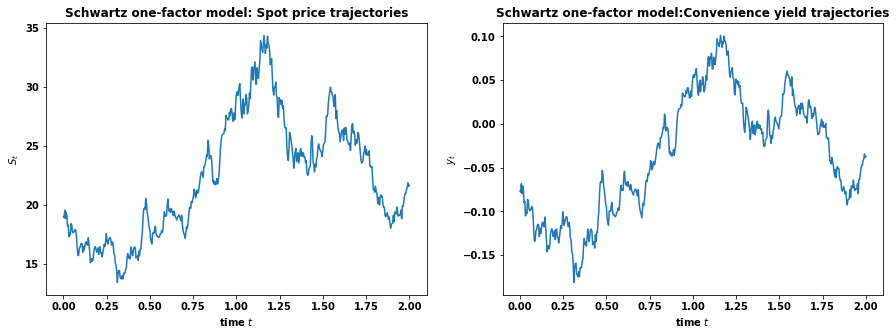

In [5]:
# Plot the P-dynamics of the spot price

N = 500 # number of time steps in the simulation

[times,S, y] = sim_Schwartz_1(T,N,S0,kappa,mu,sigma)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(times,S)
ax1.set(title='Schwartz one-factor model: Spot price trajectories',xlabel='time $t$', ylabel='$S_t$')
ax2.plot(times,y)
ax2.set(title='Schwartz one-factor model:Convenience yield trajectories',xlabel='time $t$', ylabel='$y_t$')

plt.show()

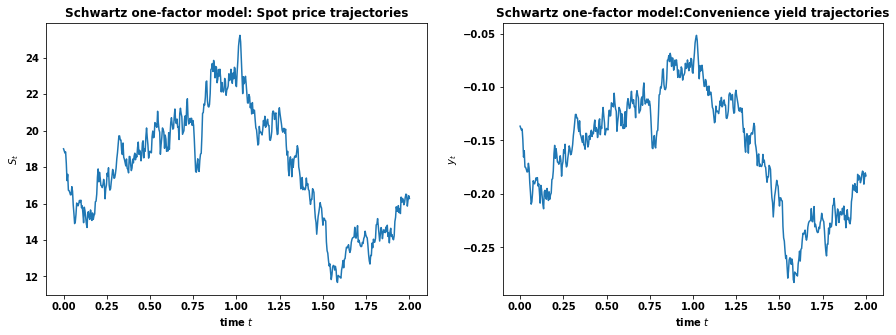

In [6]:
# Plot the Q-dynamics of the spot price

N = 500 # number of time steps in the simulation

[times,S, y] = sim_Schwartz_1(T,N,S0,kappa,mu-lam,sigma) # Just as for P-dynamics, but mu-lambda instead of mu

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(times,S)
ax1.set(title='Schwartz one-factor model: Spot price trajectories',xlabel='time $t$', ylabel='$S_t$')
ax2.plot(times,y)
ax2.set(title='Schwartz one-factor model:Convenience yield trajectories',xlabel='time $t$', ylabel='$y_t$')

plt.show()

<h2> <span style='color:green'>Question B</span> </h2>

<span style='color:green'>**(a)**</span> Simulate and plot the $\mathbb P$-dynamics of the future prices $F_t$ for $t \in [0,T]$.

<span style='color:green'>**(b)**</span> Repeat (a) using the $\mathbb Q$-dynamics instead of the $\mathbb P$-dynamics.

In [7]:
#def futures_Schwartz_1(S,tau,kappa,mu,lam, sigma):
#    alpha_star = mu - ((sigma**2)/(2*kappa)) - lam
#    X = np.log(S)
#    A = np.exp(-kappa*tau)*X
#    B = (1-np.exp(-kappa*tau))*alpha_star
#    C = ((sigma**2)/(4*kappa))*(1-np.exp(-2*kappa*tau))
#    return np.exp( A + B + C)

In [8]:
def futures_Schwartz_1(S, tau, kappa, mu, sigma, lam):
    alpha_star = mu - (sigma**2)/(2*kappa) - lam
    return np.exp( np.exp(-kappa*tau) * np.log(S) + (1 - np.exp(-kappa*tau))*alpha_star 
                  + ((sigma**2)/(4*kappa))*(1 - np.exp(-2*kappa*tau)) )

In [9]:
#T1, T, mu, kappa, alpha, lam, r, S0 = 1, 2, 0.14, 1.9, 0.1, 0.2, 0.03, 19

In [10]:
T, kappa, mu, sigma, lam, S0, r = 2, 0.3, 3.1, 0.4, -0.2, 19, 0.03 

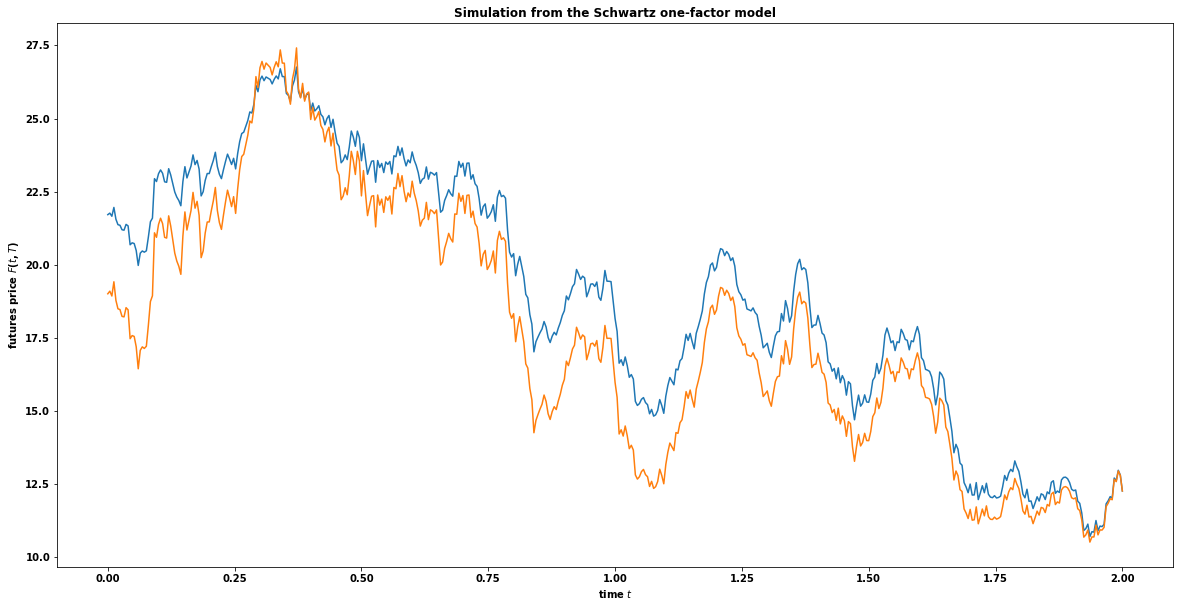

In [11]:
[times, S, y] = sim_Schwartz_1(T,N,S0,kappa,mu-lam,sigma)
F = futures_Schwartz_1(S, T-times, kappa, mu, sigma, lam)

plt.figure(figsize=(20,10))
plt.plot(times,F)
plt.plot(times,S)
plt.title('Simulation from the Schwartz one-factor model')
plt.xlabel('time $t$')
plt.ylabel('futures price $F(t,T)$')

plt.show()

F(T,T) = ST, F(0,T) =0

<h2> <span style='color:green'>Question C</span> </h2>

plot the term structure of the future prices $F_t$ for $t \in [0,T]$.


The goal of this question is to produce a visual illustration of the evolution of the term structure of futures prices over time. Set

$$
T_1 = 1 \qquad T = 2.
$$

Use the $\mathbb P$-dynamics in the following.

<span style='color:green'>**(a)**</span> Simulate a trajectory of $S_t$ and plot it for $t \in [0,T]$ (see Question 1).

<span style='color:green'>**(b)**</span> Consider five equally spaced time points $t_0,\ldots,t_4$ in $[0,T_1]$. Thus $t_i = iT_1/4$ for $i = 0,\ldots,4$. For each $t_i$, plot the corresponding futures price term structure $F(t_i,t_i + \tau)$ as $\tau$ ranges from $0$ to $1$. More precisely, for each $i$ plot

$$
(t_i+\tau, F(t_i,t_i+\tau)), \quad \tau \in [0,1]
$$

in the same figure where $S_t$ was plotted in (a). You should see the futures term structure emanating from the spot price at each of the time points $t_i$.

In [12]:
T1, T = 1, 2

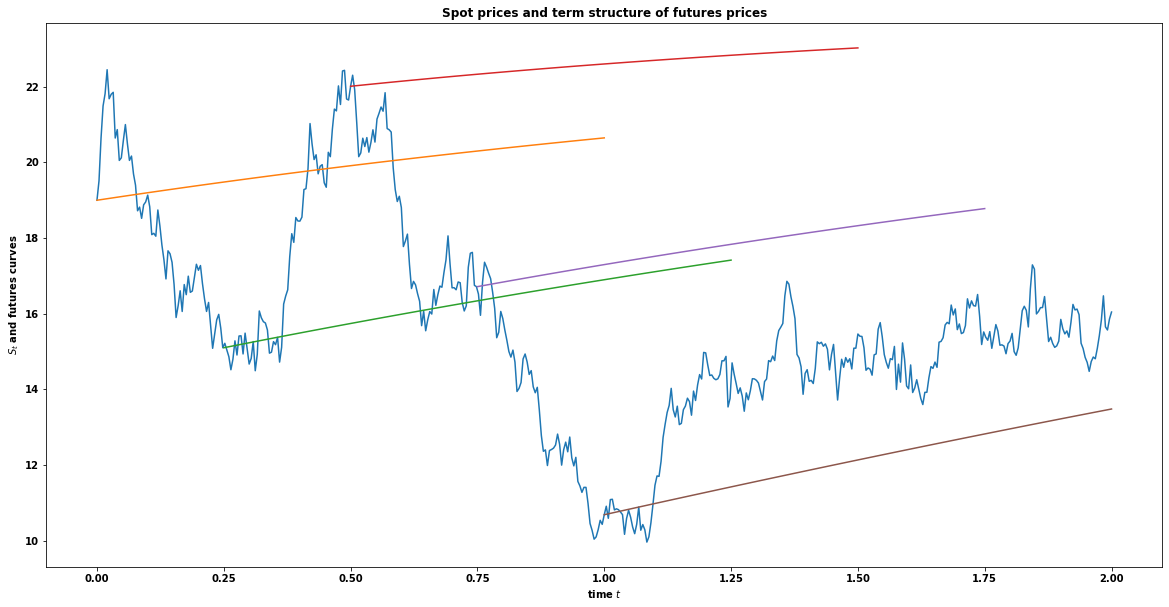

In [13]:
N = 500 # number of time steps in the simulation

[times,S, y] = sim_Schwartz_1(T,N,S0,kappa,mu,sigma)

plt.figure(figsize=(20,10))
plt.plot(times,S)

# Now plot the term structures (in the same figure):

tau = np.linspace(0, 1, 30)

for i in range(5):
    ti = i*T1/4 # time at which to start plotting the term structure
    ti_idx = int(ti * N / T) # index of the time ti
    F = futures_Schwartz_1(S[ti_idx],tau,kappa,mu,sigma,lam)
    
    plt.plot(ti + tau, F)

plt.title('Spot prices and term structure of futures prices')
plt.xlabel('time $t$')
plt.ylabel('$S_t$ and futures curves')

plt.show()

# GOAL 2

<h2> <span style='color:green'>Question A</span> </h2>

In [14]:
K=20

In [15]:
def a_func(S,tau):
    alpha_star = mu - (sigma**2)/(2*kappa) - lam
    return np.exp(-kappa*(T-T1+tau))* np.log(S) + (1 - np.exp(-kappa*(T-T1+tau)))*alpha_star +((sigma**2)/(4*kappa)) * (1 - np.exp(-2*kappa*(T-T1)))

def nu_func(tau):
    alpha_star = mu - (sigma**2)/(2*kappa) - lam
    return np.sqrt( ((sigma**2)/(2*kappa)) * np.exp(-2*kappa*(T-T1)) * (1 - np.exp(-2*kappa*tau)) )

def option_price(S,tau):
    a = a_func(S,tau)
    nu = nu_func(tau)
    d2 = (a - np.log(K))/nu
    d1 = nu + d2
    
    return np.exp(-r*(tau)) * (np.exp(a +(nu**2)/2) * norm.cdf(d1) - K * norm.cdf(d2)) 

In [16]:
#def a_func(S):
#    alpha_star = mu - (sigma**2)/(2*kappa) - lam
#    return (1 - np.exp(-kappa*(T-T1)))*alpha_star + (1 - np.exp(-2*kappa*(T-T1)))*((sigma**2)/(4*kappa)) \
#          + np.exp(-2*kappa*(T-T1))*np.log(S) + (1 - np.exp(-kappa*(T-T1))) * alpha_star * np.exp(-kappa*(T-T1))
#
#def nu_func(_):
#    alpha_star = mu - (sigma**2)/(2*kappa) - lam
#    return np.sqrt( np.exp(-2*kappa*(T-T1)) * (1-np.exp(-2*kappa*(T-T1))) * ((sigma**2)/(2*kappa)))
#
#def option_price(S):
#    #t = T1 - tau
#    a = a_func(S)
#    nu = nu_func(_)
#    d2 = (a - np.log(K))/nu
#    d1 = nu + d2
#    
#    return np.exp(-r*T1) * (np.exp(a +(nu**2)/2) * norm.cdf(d1) - K * norm.cdf(d2)) 

<h2> <span style='color:green'>Question B</span> </h2>

In [17]:
#[times,S, y] = sim_Schwartz_1(T,N,S0,kappa,mu,sigma)
#matrix = np.array([times,S, y]).T
#sorted_matrix = matrix[numpy.argsort(matrix[:, 1])]
#sorted_S = sorted_matrix[:,1]
#sorted_Times = sorted_matrix[:,0]
#CS = option_price(sorted_S,T1 - sorted_Times)
#
#plt.figure(figsize=(20,10))
#plt.plot(sorted_S,CS)
#
#plt.title('Option prices as a function of of the spot prices')
#plt.xlabel('Spot Price $S_t$')
#plt.ylabel('Option price $C_t$')
#
#plt.show()

In [18]:
[times,S, y] = sim_Schwartz_1(T,N,S0,kappa,mu,sigma)


In [19]:
times[times<T1].shape

(250,)

In [20]:
S.shape

(501,)

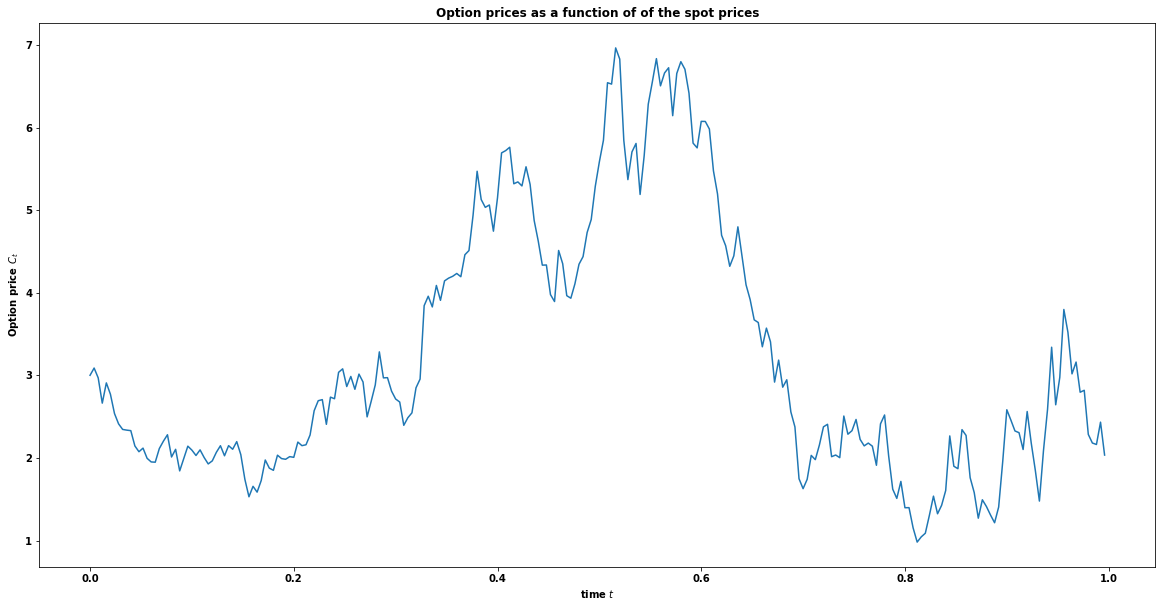

In [21]:
#CS = option_price(sorted_S, T1-times)

plt.figure(figsize=(20,10))

times_beforeT1 = times[times<T1]
plt.plot(times_beforeT1,option_price(S[0:250], T1-times_beforeT1))
# S here is S_t
#plt.plot(times,option_price(S))

plt.title('Option prices as a function of of the spot prices')
plt.xlabel('time $t$')
plt.ylabel('Option price $C_t$')

plt.show()

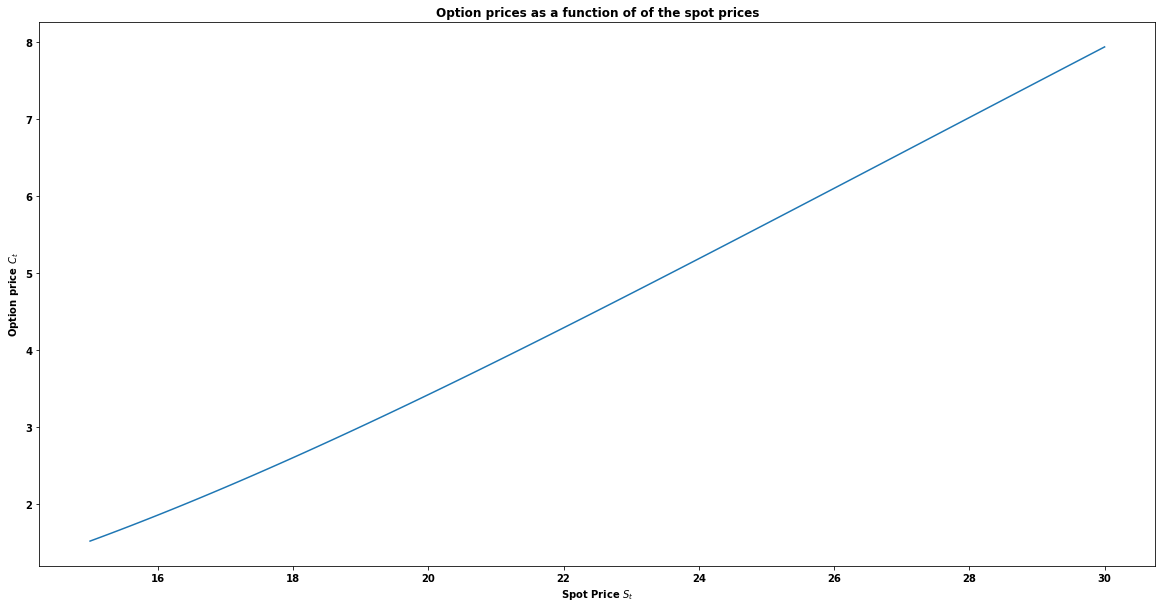

In [22]:
matrix = np.array([times,S, y]).T
sorted_matrix = matrix[numpy.argsort(matrix[:, 1])]
sorted_S = sorted_matrix[:,1]
sorted_Times = sorted_matrix[:,0]
S = np.linspace(15,30,100)
#CS = option_price(sorted_S[0:250], T1-sorted_Times[sorted_Times<T1])
#CS = option_price(sorted_S)
CS = option_price(S, T1-0)


plt.figure(figsize=(20,10))
#plt.plot(sorted_S[0:250],CS)
plt.plot(S,CS)

plt.title('Option prices as a function of of the spot prices')
plt.xlabel('Spot Price $S_t$')
plt.ylabel('Option price $C_t$')

plt.show()

<h2> <span style='color:green'>Question C</span> </h2>

In [23]:
def sim_W_many(T,N,M):
    dt = T/N # size of the intervals
    times = dt*np.arange(0,N+1) # grid of times t_0,...,t_N
    dW = np.sqrt(dt)*np.random.randn(M, N) # dW is a vector containing the ind. increments over the grid
    W = np.cumsum(dW, axis=1) # cumulative sum: W = [dW[0], dW[0]+dW[1], dW[0]+dW[1]+dW[2], ..., dW[0]+...+dW[N-1]]
    W = np.insert(W, 0, 0, axis=1) # include zero; we want W[0] = 0
    return [times,W]


def sim_Schwartz_1_many(T,N,M,S0,kappa,mu,sigma):
    dt = T/N
    [times,W] = sim_W_many(T,N,M) # construct grid and simulate Brownian motion
    S = np.zeros([M, N+1])
    S[:,0] = S0
    for i in range(N):
        S[:,i+1] = S[:,i] + kappa*(mu - np.log(S[:,i]))*S[:,i]*dt + sigma*S[:,i]*(W[:,i+1]-W[:,i]) # leave blank 
    
    return [times,S]


def futures_Schwartz_1_many(S, tau, kappa, mu, sigma, lam):
    alpha_star = mu - (sigma**2)/(2*kappa) - lam 
    return np.exp( np.exp(-kappa*tau) * np.log(S) + (1 - np.exp(-kappa*tau))*alpha_star 
                  + ((sigma**2)/(4*kappa))*(1 - np.exp(-2*kappa*tau)) )

In [24]:
def option_price_MC(T,N,M,S0,kappa,mu,lam,sigma):
    
    [times, S] = sim_Schwartz_1_many(T,N,M,S0,kappa,mu-lam,sigma)
    F = futures_Schwartz_1_many(S, T-times, kappa, mu, sigma, lam)
    
    # get index from times when times  equal T1
    index_time = np.where(times == T1)
    #print(index_time)
    #index_time = 0
    C = np.exp(-r*T1)*np.mean(np.maximum((F[:,index_time]-K),0)) # C will be the Monte Carlo estimate of the price           
    A = np.mean(np.log(F[:,index_time]))
    NU = np.std(np.log(F[:,index_time]))
    s = np.exp(-r*T1)*np.sqrt(np.var(np.maximum(F[:,index_time]-K,0),ddof=1)) # empirical standard dev. as described above
    
    L = 2 * s * 1.96 / np.sqrt(M) # Lenght of the 95% confidence interval
    
    return [index_time,times,S,F,C,L, A, NU]

In [25]:
M = 10**5

In [26]:
[index_time,times,S,F,C,L, A, NU] = option_price_MC(T,N,M,S0,kappa,mu,lam,sigma)

In [27]:
C

2.9912227208292577

In [28]:
#option_price(np.mean(S[:,index_time]),index_time[0][0])
tau = T1-0
option_price(S0,tau)

3.001973129978024

In [29]:
L

0.05183442497586066

In [30]:
A

3.0436615255886723

In [31]:
NU

0.2571900426656943

In [32]:
a_func(S0,tau)

3.0447055259042757

In [33]:
nu_func(tau)

0.25696558741425507

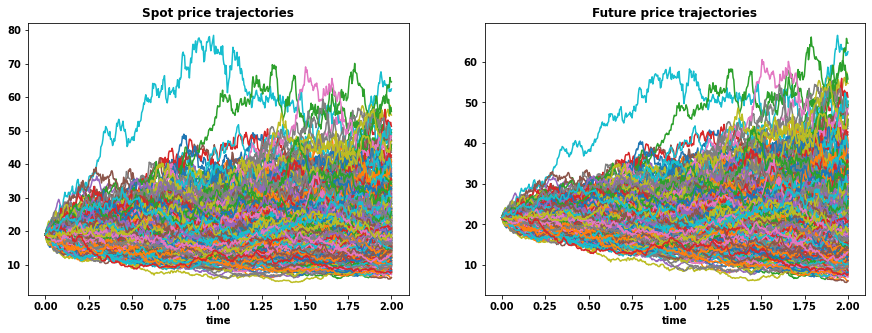

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
for i in range(0,500):
    ax1.plot(times,S[i,:])
    ax1.set(title='Spot price trajectories',xlabel='time')
    ax2.plot(times,F[i,:])
    ax2.set(title='Future price trajectories',xlabel='time')

plt.show()

# GOAL 3

<h2><span style='color:green'>Question A</span></h2>

#### definition of the delta hedge

In [147]:
def F_delta_hedge(S,t):
    tau = T1-t
    a = a_func(S,tau)
    eta = nu_func(tau)
    d2 = (a - np.log(K))/eta
    d1 = eta + d2
    alpha_star = mu - (sigma**2)/(2*kappa) - lam 
    
#     dC = (np.exp(-tau*(r-kappa)) * np.exp(-kappa*(T-T1)) * np.exp(a+(nu**2)/2) * 
#           (np.sqrt(2*3.14)*nu*norm.cdf(d1) + np.exp(-(d1**2)/2) - K*np.exp(-a+(nu**2)/2+(d2**2)/2)))/(np.sqrt(2*3.14)*S*nu)
    
    A = np.exp(a+eta**2/2)*np.exp(-kappa*(T-t))*norm.cdf(d1)/(S)
    B = np.exp(-d1**2/2)*np.exp(a+eta**2/2)*np.exp(-kappa*((T-t)))/(np.sqrt(2*3.1415)*eta*S)
    C = -K*(np.exp(-d2**2/2)*np.exp(-kappa*((T-t))))/(np.sqrt(2*3.1415)*eta*S)
    dC = np.exp(-r*tau)*(A+B+C)
    
    dF = np.exp(-kappa*tau)*futures_Schwartz_1(S, T-T1, kappa, mu, sigma, lam)/S

    return dC/dF

<h1> Simulation of wealth process of a delta-hedging strategy for a call</h1>


$$ dX_t = r(X_t-\delta_t F_t)dt+\delta_t dF_t $$

<h3>Idea</h3> Do it over a grid of points $t_k$, starting from $X_0=$ price of the option at time 0, 

$$ X_{t_{k+1}}=X_{t_{k}}+r(X_{t_k}-\delta_{t_k} F_{t_k})\Delta t+\delta_{t_k} (F_{t_{k+1}}-F_{t_k}) $$

In [148]:
def sim_S_F_X(T,T1,N,S0,kappa,r,sigma,K):
    # function to simulate the trajectories of the price and the wealth of the delta hedging strategy
    # over a finite grid of points t_0=0,t_1,...,t_N=T with interval size dt=T/N
    
    dt = T/N
    [times, S, y] = sim_Schwartz_1(T,N,S0,kappa,mu-lam,sigma)
    F = futures_Schwartz_1(S, T-times, kappa, mu, sigma, lam)
    
    times = times[times<=T1]
    F = F[0:times.shape[0]]
    print(len(F))

    tau = T-times
    delta = F_delta_hedge(S[0:times.shape[0]],times)
    X = np.zeros(times.shape[0])
    X[0] = option_price(S0, T1)
    
    for i in range(times.shape[0]-1):
        X[i+1] = X[i] + r* (X[i]-delta[i]*F[i])*dt + delta[i]*(F[i+1]-F[i]) 
        
    return [times,S,F,X]

Using the functions sim_S_X and bs_call_price in order to plot in the same plot: 
- one simulated trajectory for the wealth
- The real option prices over the times in the grid

What do you observe?


251


<ipython-input-147-b16971f3691d>:5: RuntimeWarning: divide by zero encountered in true_divide
  d2 = (a - np.log(K))/eta
<ipython-input-147-b16971f3691d>:13: RuntimeWarning: invalid value encountered in true_divide
  B = np.exp(-d1**2/2)*np.exp(a+eta**2/2)*np.exp(-kappa*((T-t)))/(np.sqrt(2*3.1415)*eta*S)
<ipython-input-147-b16971f3691d>:14: RuntimeWarning: invalid value encountered in true_divide
  C = -K*(np.exp(-d2**2/2)*np.exp(-kappa*((T-t))))/(np.sqrt(2*3.1415)*eta*S)


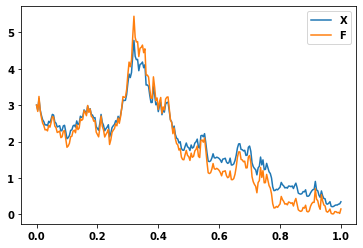

In [160]:
N = 500
[times,S,F,X]=sim_S_F_X(T,T1,N,S0,kappa,r,sigma,K)
indexT1 = times.shape[0]
plt.figure(figsize=(20,10))
plt.plot(times,X,label = 'X')

plt.plot(times,np.append(option_price(S[0:indexT1-1], T1-times[:-1]),np.maximum(F[-1]-K,0)),label = 'F')

plt.legend()
plt.show()

<h2><span style='color:green'>Question B</span></h2>

We call the lazy strategy the following strategy of the seller of a call option: no hedging is done by the seller, he/she just invests $X_0$ (i.e. the premium of the option) in the money market account. 

The P\&L from the lazy strategy, taking into account the short position on the call option, is

$$X_0{\rm e}^{rT_1}-(F[T_1,T]-K)_+$$

We want to evaluate the performance of this strategy vs. the delta-hedging.

To this end, complete the code below and simulate 1000 trajectories of prices and wealths of delta-hedging strategies using sim_S_X.

For each simulation calculate the following two P\&L's:

- $PL1$ = final wealth of the delta hedging strategy - payoff of the option;
- $PL2$ = final wealth of the lazy strategy - payoff of the option.

Display in two different histograms the values of $PL1$ and $PL2$ obtained. What do you observe? 
